In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 12 16:02:52 2019

@author: Pias Tanmoy
"""


from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import shuffle
import pandas as pd
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
import glob
from sklearn.model_selection import train_test_split
import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

np.random.seed(0)
N_EPOCH = 20
BATCH_SIZE = 50
VERBOSE = 1
N_CLASS = 2
OPTIMIZER = Adam()
N_HIDDEN_1 = 128
VALIDATION_SPLIT = 0.2
RESHAPE = 784
DROPOUT = 0.1



x = pd.read_csv('/content/drive/My Drive/Google_Colab/HAR/dataset/X_5000_seq_200_test.csv')
y = pd.read_csv('/content/drive/My Drive/Google_Colab/HAR/dataset/Y_5000_seq_200_test.csv')
#x_test = pd.read_csv('/content/drive/My Drive/Google_Colab/HAR/dataset/X_5000_seq_200_test.csv')
#y_test = pd.read_csv('/content/drive/My Drive/Google_Colab/HAR/dataset/Y_5000_seq_200_test.csv')

y = y.astype(int)
onehotencoder = OneHotEncoder(categorical_features = [0])
y = onehotencoder.fit_transform(y).toarray()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)


#X_train, Y_train = shuffle(X_train, y_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
x_train.shape

(26800, 1200)

In [0]:
DROPOUT = 0.5
def create_model():
  classifier = Sequential()
  classifier.add(Dense(units = 500, activation='relu', kernel_initializer='glorot_uniform', input_dim=1200))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 100, activation='relu', kernel_initializer = 'glorot_uniform'))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 50, activation='relu', kernel_initializer = 'glorot_uniform'))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 500, activation='relu', kernel_initializer = 'glorot_uniform'))
  classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))
  classifier.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
  model = classifier
  
  return model

model = create_model()

#model = create_model()


In [0]:
BATCH_SIZE = 20
VALIDATION_SPLIT = 0.2

history = model.fit(x_train, y_train, batch_size = BATCH_SIZE, 
                    epochs = 50, verbose = VERBOSE, 
                    validation_split=VALIDATION_SPLIT,
                    shuffle = True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 21440 samples, validate on 5360 samples
Epoch 1/50
21440/21440 [==============================] - 19s 898us/step - loss: 0.3510 - acc: 0.8346 - val_loss: 0.1686 - val_acc: 0.9582
Epoch 2/50
21440/21440 [==============================] - 17s 774us/step - loss: 0.1786 - acc: 0.9310 - val_loss: 0.1082 - val_acc: 0.9705
Epoch 3/50
21440/21440 [==============================] - 16s 738us/step - loss: 0.1314 - acc: 0.9512 - val_loss: 0.0779 - val_acc: 0.9813
Epoch 4/50
21440/21440 [==============================] - 17s 791us/step - loss: 0.0954 - acc: 0.9636 - val_loss: 0.0527 - val_acc: 0.9866
Epoch 5/50
21440/21440 [==============================] - 16s 727us/step - loss: 0.0848 - acc: 0.9701 - val_loss: 0.0355 - val_acc: 0.9869
Epoch 6/50
21440/21440 [==============================] - 16s 726us/step - loss: 0.0812 - acc: 0.9720 - val_loss: 0.0515 - val_acc: 0.9879
Epoch 7/50
21440/21440 

13200/13200 [==============================] - 1s 91us/step
Test Score:  0.005196308490254716
Accuracy:  0.9983333333333333
sklearn Macro-F1-Score: 0.9983332988973601
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


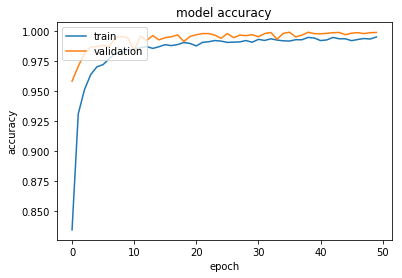

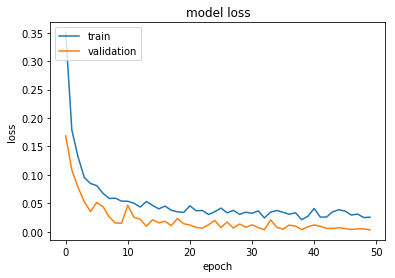

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Test Score: ", scores[0])
print("Accuracy: " , scores[1])


y_pred = model.predict(x_test)
y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

from sklearn.metrics import f1_score
print('sklearn Macro-F1-Score:', f1_score(y_test_argmax, y_pred_argmax, average='macro'))

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

from google.colab import files
plt.savefig("acc.png", dpi=300)
#files.download("acc.png") 
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("loss.png", dpi=300)
#files.download("loss.png") 
plt.show()

Confusion matrix, without normalization
[[6619    0]
 [  22 6559]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


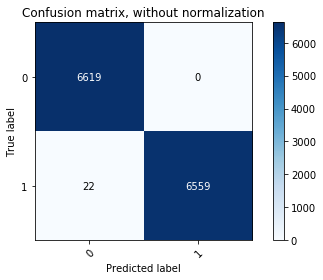

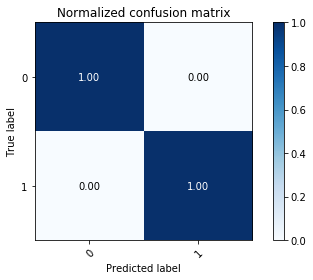

In [0]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array([0, 1, 2])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confusion_mat_count.png', dpi=300)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('confusion_mat_%.png', dpi=300)

plt.show()